# Classification Model

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

from xgboost import XGBClassifier
import pickle

In [118]:
data = pd.read_csv('../data/cleaned/weatherQN_2021_2025_cleaned.csv')
data.head(10)

,time,temp,dwpt,rhum,prcp,wdir,wspd,pres,coco
0,2021-01-01 07:00:00,22.1,14.7,63.0,0.235689,360.0,14.4,1017.5,1.0
1,2021-01-01 10:00:00,21.5,16.9,75.0,0.235689,340.0,14.4,1018.4,1.0
2,2021-01-01 13:00:00,21.5,16.9,75.0,0.235689,340.0,10.8,1017.0,1.0
3,2021-01-01 16:00:00,22.2,17.8,76.0,0.235689,360.0,14.4,1016.0,1.0
4,2021-01-01 19:00:00,22.0,16.9,73.0,0.235689,340.0,7.2,1017.6,1.0
5,2021-01-01 22:00:00,21.0,16.6,76.0,0.235689,340.0,10.8,1017.7,1.0
6,2021-01-02 00:00:00,20.0,17.4,85.0,0.235689,350.0,20.2,1017.9,1.0
7,2021-01-02 01:00:00,20.0,17.8,87.0,0.200000,340.0,14.4,1016.8,1.0
8,2021-01-02 02:00:00,20.1,17.5,85.0,0.100000,348.0,18.7,1016.5,1.0
9,2021-01-02 03:00:00,20.0,17.8,87.0,0.200000,343.0,17.6,1016.1,1.0


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35304 entries, 0 to 35303
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    35304 non-null  object 
 1   temp    35304 non-null  float64
 2   dwpt    35304 non-null  float64
 3   rhum    35304 non-null  float64
 4   prcp    35304 non-null  float64
 5   wdir    35304 non-null  float64
 6   wspd    35304 non-null  float64
 7   pres    35304 non-null  float64
 8   coco    35304 non-null  float64
dtypes: float64(8), object(1)
memory usage: 2.4+ MB


In [120]:
data['time'] = pd.to_datetime(data['time'])
data['hour'] = data['time'].dt.hour
data['day'] = data['time'].dt.day
data['month'] = data['time'].dt.month
data['year'] = data['time'].dt.year
data.drop(columns='time', inplace=True)

In [121]:
data.head(10)

,temp,dwpt,rhum,prcp,wdir,wspd,pres,coco,hour,day,month,year
0,22.1,14.7,63.0,0.235689,360.0,14.4,1017.5,1.0,7,1,1,2021
1,21.5,16.9,75.0,0.235689,340.0,14.4,1018.4,1.0,10,1,1,2021
2,21.5,16.9,75.0,0.235689,340.0,10.8,1017.0,1.0,13,1,1,2021
3,22.2,17.8,76.0,0.235689,360.0,14.4,1016.0,1.0,16,1,1,2021
4,22.0,16.9,73.0,0.235689,340.0,7.2,1017.6,1.0,19,1,1,2021
5,21.0,16.6,76.0,0.235689,340.0,10.8,1017.7,1.0,22,1,1,2021
6,20.0,17.4,85.0,0.235689,350.0,20.2,1017.9,1.0,0,2,1,2021
7,20.0,17.8,87.0,0.200000,340.0,14.4,1016.8,1.0,1,2,1,2021
8,20.1,17.5,85.0,0.100000,348.0,18.7,1016.5,1.0,2,2,1,2021
9,20.0,17.8,87.0,0.200000,343.0,17.6,1016.1,1.0,3,2,1,2021


In [122]:
scaler = StandardScaler()
data[['temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres']] = scaler.fit_transform(data[['temp', 'dwpt', 'rhum', 'prcp', 'wdir', 'wspd', 'pres']])

In [123]:
X = data.drop(columns='coco')
y = data['coco']

In [124]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [125]:
print("Original Labels:", label_encoder.classes_)
print("Encoded Labels:", np.unique(y))

Original Labels: [ 1.  2.  3.  5.  7.  8.  9. 17. 18.]
Encoded Labels: [0 1 2 3 4 5 6 7 8]


In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y)),
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    tree_method='hist',
    device='cuda',
    random_state=42
)

In [128]:
model.fit(X_train, y_train)

AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=9,
              num_parallel_tree=None, ...)

In [129]:
y_pred = model.predict(X_test)

In [130]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8452060614643818%

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      2874
           1       0.58      0.04      0.07       480
           2       0.77      0.98      0.87      2444
           3       0.58      0.47      0.52        40
           4       0.72      0.85      0.78       305
           5       0.78      0.91      0.84       356
           6       0.88      0.94      0.91       224
           7       0.57      0.36      0.44       298
           8       0.50      0.28      0.35        40

    accuracy                           0.85      7061
   macro avg       0.71      0.64      0.64      7061
weighted avg       0.84      0.85      0.82      7061



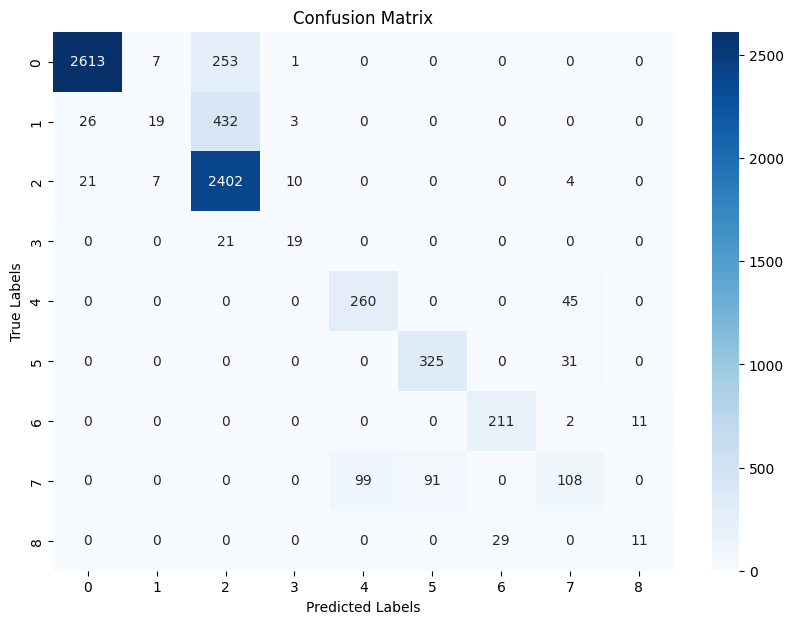

In [131]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [132]:
with open("models/cf_model.pkl", "wb") as f:
    pickle.dump(model, f)